**Exhaustive Synopsis using Extractive Summarization Approaches for Patient Conversations with Chatbots**

Technologies used:


1.   Nltk Libraries
2.   Sumy libraries - SpaCy models for Parsing, Tokenization, LexRank, Entity Linking and Summarization







In [ ]:
# importing necessary libraries
import os
from textblob import TextBlob
import spacy
from gensim.summarization.summarizer import summarize
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk import sent_tokenize
from nltk import word_tokenize

# This tokenizer divides a text into a list of sentences
# by using an unsupervised algorithm to build a model for abbreviation
# words, collocations, and words that start sentences.  It must be
# trained on a large collection of plaintext in the target language
# before it can be used.

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Sumy - module for automatic summarization of text documents
!pip install sumy

     |████████████████████████████████| 94 kB 2.3 MB/s 
     |████████████████████████████████| 10.1 MB 40.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=eaed1e6e3dbf2fec57358791475e17088da63783a122fa284fbc7205ec07b37b
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=53d3b9bc426d16aeca92f5c9d7cfaf023ab0975b82e526caf30355967d02d611
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built breadability pycountry


In [ ]:
# importing other necessary libraries required for text pre-processing

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
import pandas as pd
import numpy as np

# loading the dataset - subject to user's path; uploaded from my colab

df = pd.read_csv('/content/drive/MyDrive/inc_hack/patient_notes.csv')

In [ ]:
# representation of our dataset's first few rows

df.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [ ]:
# text preprocessing -
# tokenizing our text from the pn_history column of our dataset 

sentences = []
for s in df['pn_history']:
  sentences.append(sent_tokenize(s))
sentences = [y for x in sentences for y in x]
sentences[:5]

clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# forcing our text into lowercase

clean_sentences = [s.lower() for s in clean_sentences]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Stop words removal: Stop words are very commonly used words (a, an, the, etc.) in the documents. These words do not really signify any importance as they do not help in distinguishing two bodies of text.
They also take valuable processing power and time if they were included.


In [ ]:
# A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore,
# both when indexing entries for searching and when retrieving them as the result of a search query. 
# We would not want these words to take up space in our database, or taking up valuable processing time. 

nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]
print(clean_sentences[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
mr cleveland mother given verbal consent history physical examination treatment began months ago sudden intermittent days lasting min worsening non allev aggrav associated dispnea exersion rest stressed school reports fe feels like heart jumping chest ros denies chest pain dyaphoresis wt loss chills fever nausea vomiting pedal edeam pmh non meds aderol friend nkda fh father mi recently mother thyroid dz sh non smoker mariguana months ago beers weekend basketball school sh std


**Summarization Using LexRank**

LexRank is an unsupervised graph based approach for automatic text summarization. The scoring of sentences is done using the graph method. LexRank is used for computing sentence importance based on the concept of eigenvector centrality in a graph representation of sentences.
[https://iq.opengenus.org/lexrank-text-summarization/](https://)

**Lemmatization**

 Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

[https://spacy.io/usage/linguistic-features#lemmatization](https://)

**Entity Identifying**

[https://spacy.io/usage/linguistic-features#entity-linking](https://)

In [ ]:
# implementing LexRank summarization using spaCy 

def sumy_summarizer(data):
	parser = PlaintextParser.from_string(data,Tokenizer("english"))
	lexranksummr = LexRankSummarizer()
	summr = lexranksummr(parser.document,3)
	summarized = [str(sentence) for sentence in summr]
	result = ' '.join(summarized)
	return result

# implementing lemmatization using spaCy

def text_analyzer(my_text):
	nlp = spacy.load('en_core_web_sm')
	data = nlp(my_text)
	# tokens = [ token.text for token in data]
	allData = [('"Token":{},\n"Lemma":{}'.format(token.text,token.lemma_))for token in data ]
	return allData

# implementing entity analysis using spaCy

def entity_analyzer(my_text):
	nlp = spacy.load('en_core_web_sm')
	data = nlp(my_text)
	tokens = [ token.text for token in data]
	entities = [(entity.text,entity.label_)for entity in data.ents]
	allData = ['"TOKEN":{},\n"ENTITIES":{}'.format(tokens,entities)]
	return allData


In [ ]:
# Printing the summaries we derive using our approach for the given dataset

summr = []

for i in range(0, 20):
  print(sumy_summarizer(clean_sentences[i]))

year old male come student health clinic complaining heart pounding
mr cleveland mother given verbal consent history physical examination treatment began months ago sudden intermittent days lasting min worsening non allev aggrav associated dispnea exersion rest stressed school reports fe feels like heart jumping chest ros denies chest pain dyaphoresis wt loss chills fever nausea vomiting pedal edeam pmh non meds aderol friend nkda fh father mi recently mother thyroid dz sh non smoker mariguana months ago beers weekend basketball school sh std
yo male recurrent palpitations past mo lasting min happened times since beginning
one time durign baskeball game two days ago light headedness pressure chest catching breath fainting
teh episodes sweating
diarrhea heat intolerance weight loss
tried aterol able better concentrate received roommate

dillon cleveland
male patient significant pmh presents complaints heart pounding
going months happens twice month
cannot think triggers occurred activit

In [ ]:
sumy_summarizer(clean_sentences[0:200])
print(''.join(clean_sentences[0:20]))

year old male come student health clinic complaining heart poundingmr cleveland mother given verbal consent history physical examination treatment began months ago sudden intermittent days lasting min worsening non allev aggrav associated dispnea exersion rest stressed school reports fe feels like heart jumping chest ros denies chest pain dyaphoresis wt loss chills fever nausea vomiting pedal edeam pmh non meds aderol friend nkda fh father mi recently mother thyroid dz sh non smoker mariguana months ago beers weekend basketball school sh stdyo male recurrent palpitations past mo lasting min happened times since beginningone time durign baskeball game two days ago light headedness pressure chest catching breath faintingteh episodes sweatingdiarrhea heat intolerance weight losstried aterol able better concentrate received roommatedillon clevelandmale patient significant pmh presents complaints heart poundinggoing months happens twice monthcannot think triggers occurred activity restoccas

In [ ]:
# text_analyzer(clean_sentences[1])
import re

analysis = []

for i in range(0, 20):
  analysis = text_analyzer(clean_sentences[i])
  for k in analysis:
    print("",re.sub(r"[^a-zA-Z0-9]+", ' ', k))


  Token year Lemma year
  Token old Lemma old
  Token male Lemma male
  Token come Lemma come
  Token student Lemma student
  Token health Lemma health
  Token clinic Lemma clinic
  Token complaining Lemma complain
  Token heart Lemma heart
  Token pounding Lemma pounding
  Token mr Lemma mr
  Token cleveland Lemma cleveland
  Token mother Lemma mother
  Token given Lemma give
  Token verbal Lemma verbal
  Token consent Lemma consent
  Token history Lemma history
  Token physical Lemma physical
  Token examination Lemma examination
  Token treatment Lemma treatment
  Token began Lemma begin
  Token months Lemma month
  Token ago Lemma ago
  Token sudden Lemma sudden
  Token intermittent Lemma intermittent
  Token days Lemma day
  Token lasting Lemma last
  Token min Lemma min
  Token worsening Lemma worsen
  Token non Lemma non
  Token allev Lemma allev
  Token aggrav Lemma aggrav
  Token associated Lemma associated
  Token dispnea Lemma dispnea
  Token exersion Lemma exersion
  Token 

In [ ]:
# Entity Analysis for patient's inputs: 
entities = []


for i in range(0, 40):
  entities.append(entity_analyzer(clean_sentences[i]))
  entity = entity_analyzer(clean_sentences[i])
  for k in entity:
    print("",re.sub(r"[^a-zA-Z0-9]+", ' ', k))  

  TOKEN year old male come student health clinic complaining heart pounding ENTITIES year DATE 
  TOKEN mr cleveland mother given verbal consent history physical examination treatment began months ago sudden intermittent days lasting min worsening non allev aggrav associated dispnea exersion rest stressed school reports fe feels like heart jumping chest ros denies chest pain dyaphoresis wt loss chills fever nausea vomiting pedal edeam pmh non meds aderol friend nkda fh father mi recently mother thyroid dz sh non smoker mariguana months ago beers weekend basketball school sh std ENTITIES cleveland GPE months ago DATE months ago DATE weekend DATE 
  TOKEN yo male recurrent palpitations past mo lasting min happened times since beginning ENTITIES yo male recurrent ORG mo lasting min PERSON 
  TOKEN one time durign baskeball game two days ago light headedness pressure chest catching breath fainting ENTITIES one CARDINAL two days ago DATE 
  TOKEN teh episodes sweating ENTITIES teh ORG 
  TO

In [ ]:
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(clean_sentences[13])
displacy.render(doc, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    one\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n instance experienced chest pressure lightheadedness shortness breath minutes heart pounding</div>'

Visual Representation of Entity Recognition:

Albeit, not fully accurate but, does recognise human names, dates etc.

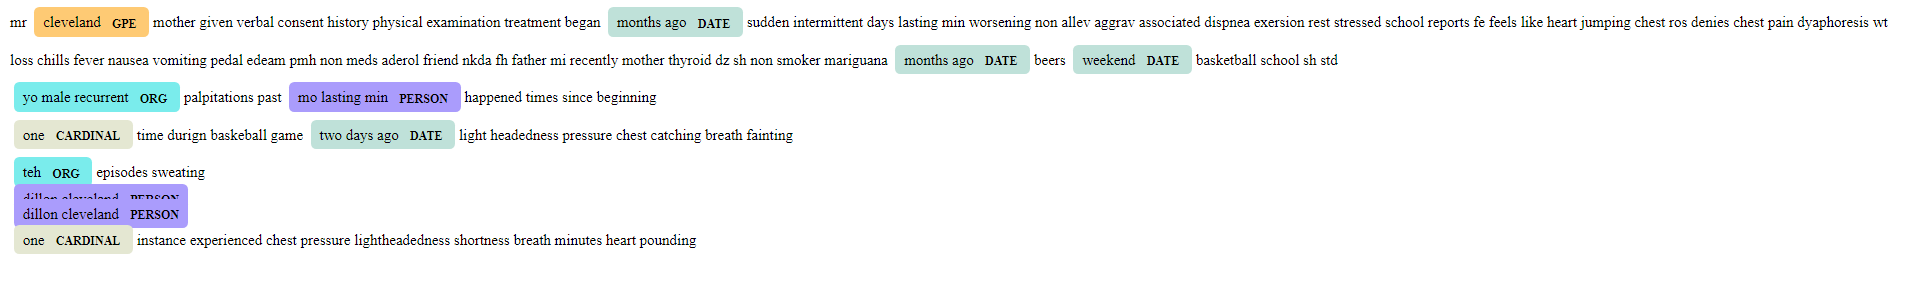